In [1]:
import numpy as np
import cv2
import img2pdf 
from PIL import Image 
import os
import math
import time
from matplotlib import pyplot as plt


In [2]:
files = os.listdir("images/")
print(files)

['Lenova81DE00U5IN-Back-100.jpg', 'Lenova81DE00U5IN-TopView-100.jpg', 'Lenova81DE00U5IN-SideLeft-100.jpg', 'Lenova81DE00U5IN-SideLeft-100-100.jpg', 'Lenova81DE00U5IN-TopView-100-100.jpg', 'Lenova81DE00U5IN-SideLeft.jpg', '6.jpg', 'Lenova81DE00U5IN-Back-100-100.jpg', 'Lenova81DE00U5IN-SideRight-100-100.jpg', 'Lenova81DE00U5IN-Front.jpg', 'Lenova81DE00U5IN-SideRight-100.jpg', 'Lenova81DE00U5IN-Back.jpg', 'Lenova81DE00U5IN-Front-100.jpg', 'Lenova81DE00U5IN-Front-100-100.jpg', 'Lenova81DE00U5IN-SideRight.jpg', 'Lenova81DE00U5IN-TopView.jpg']


In [53]:
def reduceImage(imagename, width, height, quality):

    # Load an color image in grayscale
#     imagename = "Lenova81DE00U5IN-Back"
    img = cv2.imread(imagename, 1)


    # cv2.imwrite('sample8-out.png',img)
#     height, width, channels = img.shape

    blue, green, red = cv2.split(img)

    # img2 = cv2.merge((blue, green, red))
    print(height)
    print(width)
    # print(channels)

    rImg = cv2.resize(img, (width, height))

    height, width, channels = rImg.shape
    print(height)
    print(width)


    saveImg(imagename.replace('.jpg','')+'-'+str(quality)+'.jpg', rImg, quality)
    # saveImg(imagename+'-98', rImg, 98)
    # saveImg(imagename+'-96', rImg, 96)
    # saveImg(imagename+'-94', rImg, 94)




In [1]:
def saveImg(imagename, img, quality):
    cv2.imwrite(imagename, img, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    cv2.waitKey(0) & 0xFF
    cv2.destroyAllWindows()

In [2]:
def readImg(imagename):
    img = cv2.imread(imagename, 1)
    return img

In [8]:
def convertToGray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

In [27]:
def getHist(img):
    x = plt.hist(grayImg.ravel(),256,[0,256]); 
    xx = []
    for a in x[0]:
        xx.append(int(a))

    return xx
    

In [70]:
def cumHist(hist):
    for i in range(1, 255):
        m = max(hist[:255])
        hist[i] = int((hist[i]/m)*100)

    y = [0]*255
    k = 0
    x = [0]*255
    for i in range(1, 255):
        k = k + hist[i]
        y[i] = k
        x[i] = i
    return x, y
    
    
        

In [82]:
def findSlopeOffset(x, y):

    slope = 0
    offset = 0
    xmean=0.0
    ymean=0.0
    xymean=0.0
    xmeansqr=0.0
    xsqrmean=0.0;
    n = 255
    for i in range(1, 255):
        xmean = x[i] + xmean
        ymean = y[i] + ymean
        xymean = xymean + (x[i]*y[i])
        xsqrmean = xsqrmean + (x[i]*x[i])
      
    xmean = xmean/n;
    ymean = ymean/n;
    xymean = xymean/n;
    xmeansqr = xmean*xmean;
    xsqrmean = xsqrmean/n;
    
#     print (xmean, ymean, xymean, xmeansqr, xsqrmean)
    slope = ((xmean*ymean) - xymean)/(xmeansqr - xsqrmean);
    offset = ymean - slope*xmean;
#     print (int(slope), int(offset))
    return int(slope), int(offset)
    

6 102
5 -75


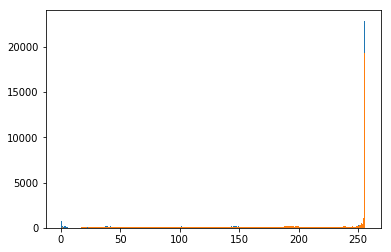

In [92]:
path = 'duplication/'
imagename = path+'5.jpg'
firstImg = readImg(imagename)
imagename = path+'6.jpg'
secondImg = readImg(imagename)

grayImg = convertToGray(firstImg)
# imagename = path+'3-out.jpg'
# quality = 100
# saveImg(imagename, grayImg, quality)
# hist = cv2.calcHist([grayImg],[0],None,[256],[0,256])
# print(hist)
hist = getHist(grayImg)
x, y = cumHist(hist)
firstSlope, firstOffset = findSlopeOffset(x, y)
print (firstSlope, firstOffset)

grayImg = convertToGray(secondImg)
hist = getHist(grayImg)
x, y = cumHist(hist)
secondSlope, secondOffset = findSlopeOffset(x, y)
print (secondSlope, secondOffset)



In [3]:
start_time = time.time()
for f in files:
    reduceImage("images/"+f, 200, 200, 100)
    print(f)

et = time.time()
print(et - start_time)
#     print(imagename.replace('.jpg',''))

NameError: name 'reduceImage' is not defined